In [6]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml

In [7]:
house_data = fetch_openml(name="house_sales", version=3, as_frame=True)

In [8]:
print(house_data)

{'data':        bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0           3.0       1.00       1180.0    5650.0     1.0         0.0   0.0   
1           3.0       2.25       2570.0    7242.0     2.0         0.0   0.0   
2           2.0       1.00        770.0   10000.0     1.0         0.0   0.0   
3           4.0       3.00       1960.0    5000.0     1.0         0.0   0.0   
4           3.0       2.00       1680.0    8080.0     1.0         0.0   0.0   
...         ...        ...          ...       ...     ...         ...   ...   
21608       3.0       2.50       1530.0    1131.0     3.0         0.0   0.0   
21609       4.0       2.50       2310.0    5813.0     2.0         0.0   0.0   
21610       2.0       0.75       1020.0    1350.0     2.0         0.0   0.0   
21611       3.0       2.50       1600.0    2388.0     2.0         0.0   0.0   
21612       2.0       0.75       1020.0    1076.0     2.0         0.0   0.0   

       condition  grade  sqft_above  ...  

In [9]:
target_values = ["bedrooms", "bathrooms", "sqft_living", "floors", "waterfront", "view", "condition", "grade", "yr_built", "yr_renovated"]
X = house_data.data[target_values].copy()

In [10]:
X.describe(include='all')

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,yr_built,yr_renovated
count,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,3.370842,2.114757,2079.899736,1.494309,0.007542,0.234303,3.409430,7.656873,1971.005136,84.402258
std,0.930062,0.770163,918.440897,0.539989,0.086517,0.766318,0.650743,1.175459,29.373411,401.679240
min,0.000000,0.000000,290.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1900.000000,0.000000
25%,3.000000,1.750000,1427.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1951.000000,0.000000
50%,3.000000,2.250000,1910.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1975.000000,0.000000
75%,4.000000,2.500000,2550.000000,2.000000,0.000000,0.000000,4.000000,8.000000,1997.000000,0.000000
max,33.000000,8.000000,13540.000000,3.500000,1.000000,4.000000,5.000000,13.000000,2015.000000,2015.000000


In [11]:
# Check if values are null
X.isnull().sum().sort_values(ascending=False)/X.shape[0]

bedrooms        0.0
bathrooms       0.0
sqft_living     0.0
floors          0.0
waterfront      0.0
view            0.0
condition       0.0
grade           0.0
yr_built        0.0
yr_renovated    0.0
dtype: float64

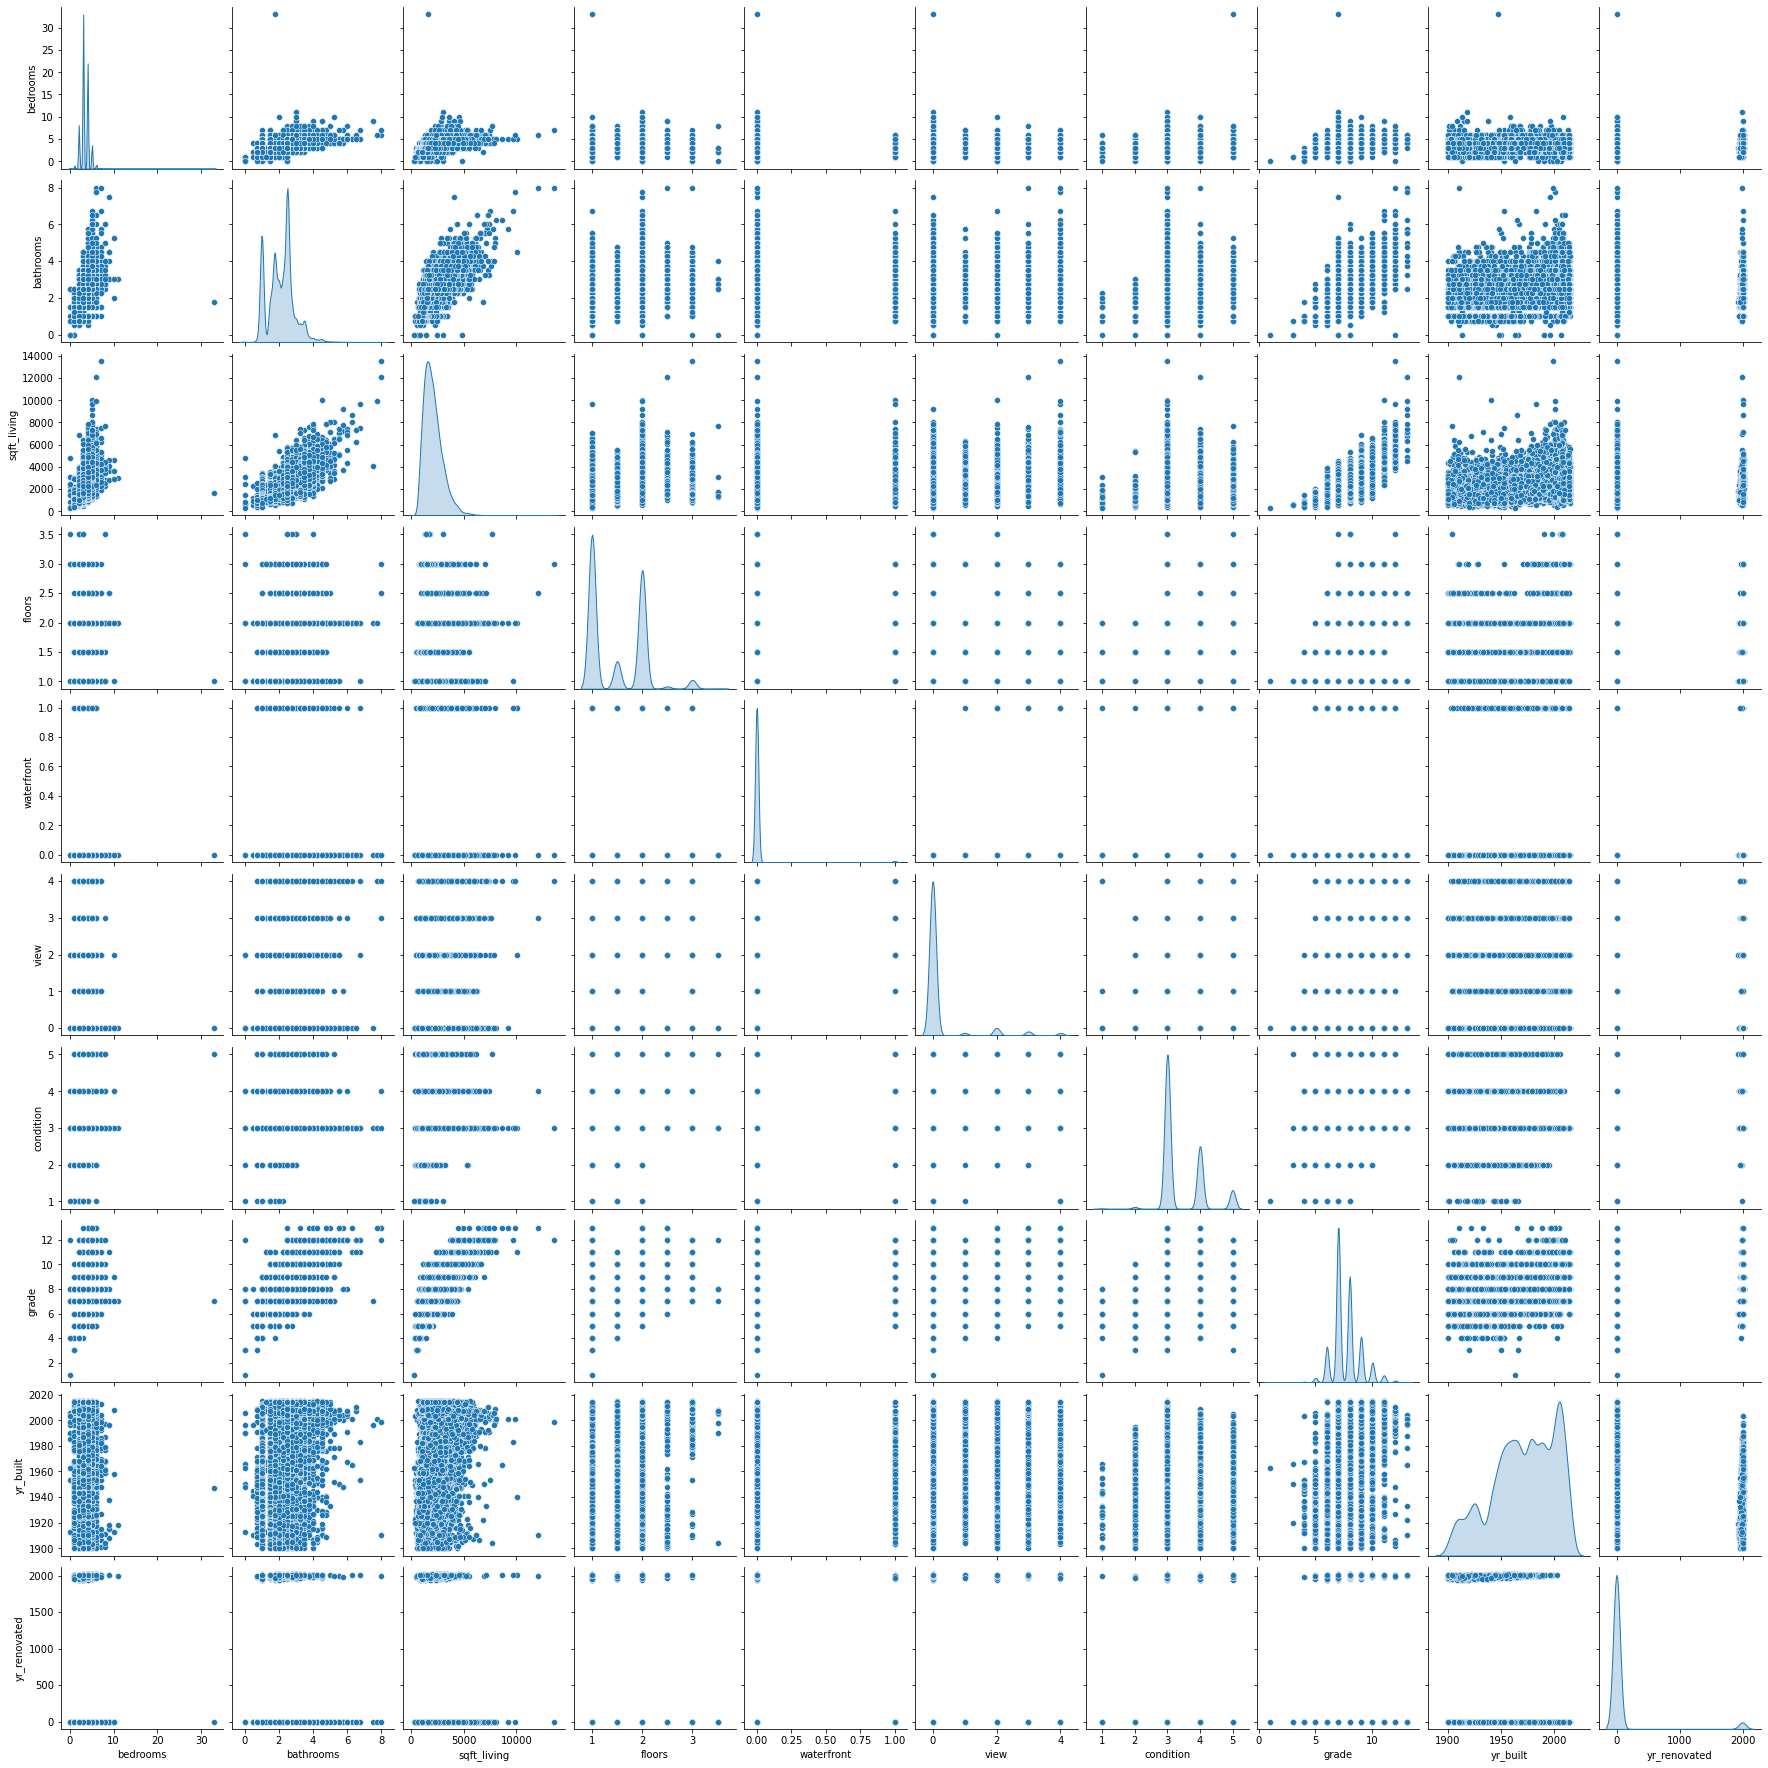

In [12]:
import seaborn as sns
sns.pairplot(data=X, diag_kind="kde")

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bedrooms      21613 non-null  float64
 1   bathrooms     21613 non-null  float64
 2   sqft_living   21613 non-null  float64
 3   floors        21613 non-null  float64
 4   waterfront    21613 non-null  float64
 5   view          21613 non-null  float64
 6   condition     21613 non-null  float64
 7   grade         21613 non-null  float64
 8   yr_built      21613 non-null  float64
 9   yr_renovated  21613 non-null  float64
dtypes: float64(10)
memory usage: 1.6 MB


In [14]:
X.waterfront.value_counts()

0.0    21450
1.0      163
Name: waterfront, dtype: int64

In [15]:
# Test:
#X.waterfront.replace(to_replace=[1, 0], value=["yes", "no"], inplace=True)
X.waterfront.replace(to_replace=["yes", "no"], value=[1,0], inplace=True)
X.waterfront.value_counts()

0.0    21450
1.0      163
Name: waterfront, dtype: int64

In [16]:
price = house_data.target

Task: Predict if price was above median price

In [17]:
y = (price < price.median()).values.astype(int)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X=X)
logistic_classifier = LogisticRegression(penalty="l1", solver = "liblinear").fit(X=X, y=y)

In [19]:
preds = logistic_classifier.predict(X)
#proba = logistic_classifier.predict_proba(X)

In [20]:
logistic_classifier.score(X, y)

0.786887521399158

Task: Predict house price

In [21]:
X = house_data.data[target_values].copy()
y = house_data.target

X = scaler.fit_transform(X=X)

In [22]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression().fit(X, y)

In [23]:
y_pred = linear_model.predict(X=X)

In [24]:
linear_model.score(X=X, y=y)

0.6514703762015077

In [25]:
from sklearn.linear_model import RidgeCV
ridge_cv_model = RidgeCV(cv=10).fit(X=X, y=y)

In [26]:
ridge_cv_model.score(X=X, y=y)


0.6514702300942736

In [27]:
# Test different models
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf = KFold(n_splits = 10)

scores = cross_val_score(estimator = linear_model, X=X, y=y, cv = kf)
print("R2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

R2: 0.65 (+/- 0.01)


In [28]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()
scores = cross_val_score(estimator = ridge_model, X=X, y=y, cv = kf)
print("R2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

R2: 0.65 (+/- 0.01)


In [29]:
# Choose most important features
from sklearn.feature_selection import SelectKBest, mutual_info_regression

fs = SelectKBest(score_func=mutual_info_regression, k="all")
fs.fit(X=X, y=y)
X_mutual_info = fs.transform(X=X)

scores = cross_val_score(estimator = ridge_model, X=X_mutual_info, y=y, cv = kf)
print("R2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

R2: 0.65 (+/- 0.01)


In [30]:
## Task: Predict house price using regression trees
from sklearn.tree import DecisionTreeRegressor

decission_tree = DecisionTreeRegressor()
decission_tree.fit(X=X, y=y)
scores = cross_val_score(estimator = decission_tree, X=X, y=y, cv = kf)
print("R2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

R2: 0.43 (+/- 0.08)


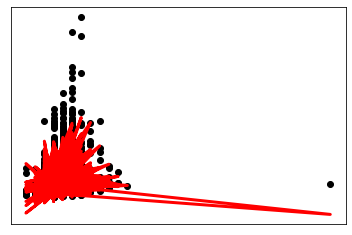

In [49]:
# Exercises with plot
import matplotlib.pyplot as plt
ridge_model = Ridge()
ridge_model.fit(X, y)
y_pred_ridge = ridge_model.predict(X=X)
plt.scatter(x=X[:, 0], y=y, color="black")
plt.plot(X[:, 0], y_pred_ridge, color="red", linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

21613